In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
import tensorflow as tf

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


### Data Preprocessing

In [3]:
df_1 = df.drop(columns=["Unnamed: 0"])
df_1.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [4]:
(df_1.isna().sum() * 100 / len(df_1)).round(2)

cut                             0.00
color                           0.00
clarity                         0.00
carat_weight                    0.00
cut_quality                     0.00
lab                             0.00
symmetry                        0.00
polish                          0.00
eye_clean                       0.00
culet_size                      0.00
culet_condition                 0.00
depth_percent                   0.00
table_percent                   0.00
meas_length                     0.00
meas_width                      0.00
meas_depth                      0.00
girdle_min                      0.00
girdle_max                      0.00
fluor_color                     0.00
fluor_intensity                65.31
fancy_color_dominant_color      0.00
fancy_color_secondary_color     0.00
fancy_color_overtone            0.75
fancy_color_intensity           0.00
total_sales_price               0.00
dtype: float64

In [5]:
(df_1.duplicated().sum() * 100 / len(df_1)).round(2)

1.77

In [6]:
df_2 = df_1.drop_duplicates()
pp = df_2.isna().sum()
pp[pp>0]

fluor_intensity         140711
fancy_color_overtone      1630
dtype: int64

In [7]:
print(df_2["fluor_intensity"].unique())

[nan 'Very Slight' 'Strong' 'Medium' 'Faint' 'Very Strong' 'unknown'
 'Slight']


In [8]:
print(df_2["fancy_color_overtone"].unique())

['unknown' nan 'Yellowish' 'Brownish' 'Pinkish' 'Greenish' 'Orangey'
 'Purplish' 'Grayish']


In [9]:
df_3 = df_2.copy()
df_3["fluor_intensity"] = df_3["fluor_intensity"].fillna("unknown")
df_3["fancy_color_overtone"] = df_3["fancy_color_overtone"].fillna("unknown")
df_3.isna().sum().sum()

0

In [10]:
data_types = df_3.dtypes
object_columns = data_types[data_types=="object"].index.values
numeric_columns = data_types[data_types!="object"].index.values[:-1]
print("Object Columns  : ",object_columns)
print("Numeric Columns : ",numeric_columns)

Object Columns  :  ['cut' 'color' 'clarity' 'cut_quality' 'lab' 'symmetry' 'polish'
 'eye_clean' 'culet_size' 'culet_condition' 'girdle_min' 'girdle_max'
 'fluor_color' 'fluor_intensity' 'fancy_color_dominant_color'
 'fancy_color_secondary_color' 'fancy_color_overtone'
 'fancy_color_intensity']
Numeric Columns :  ['carat_weight' 'depth_percent' 'table_percent' 'meas_length' 'meas_width'
 'meas_depth']


In [11]:
df_4 = df_3.copy()
le = LabelEncoder()
for i in object_columns:
    df_4[i] = le.fit_transform(df_3[i])
df_4.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,6,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,6,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,6,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,6,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,6,12,10,7,9,200


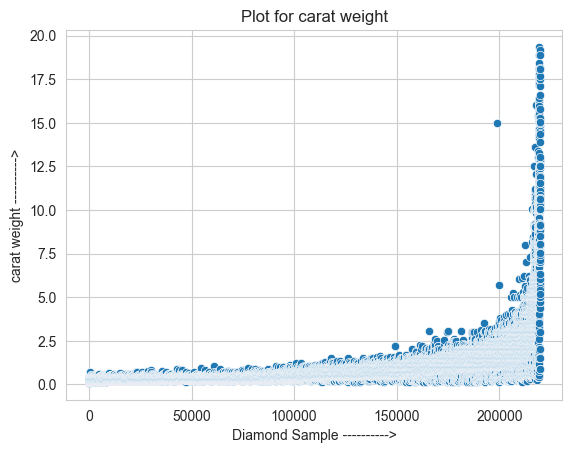

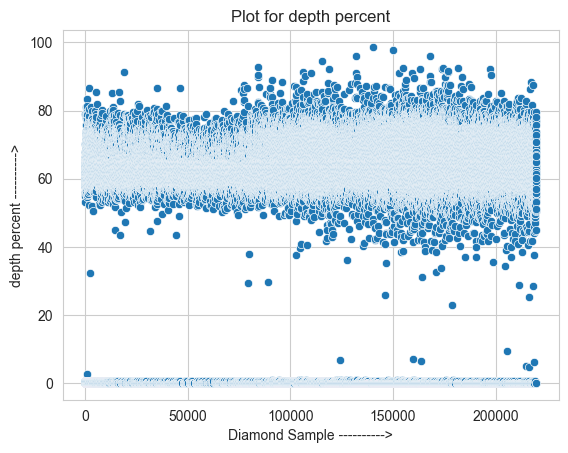

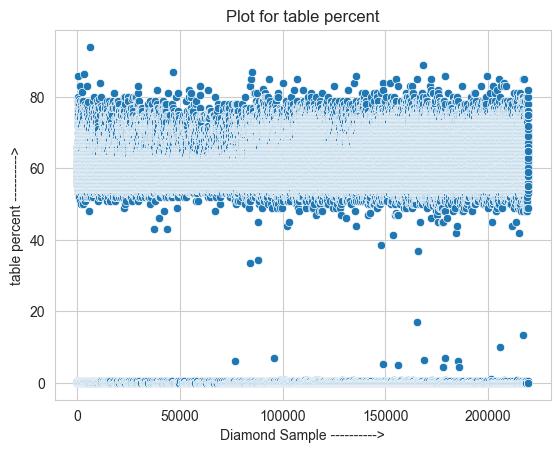

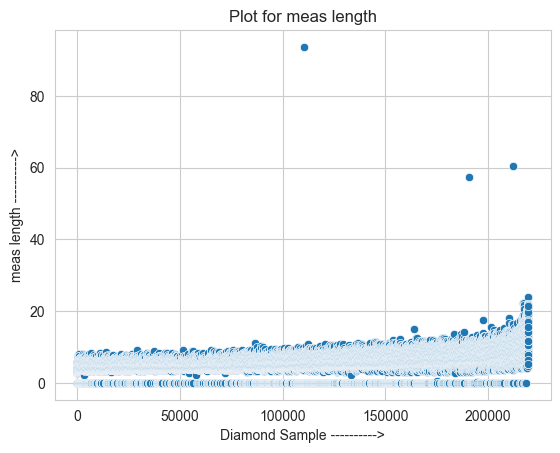

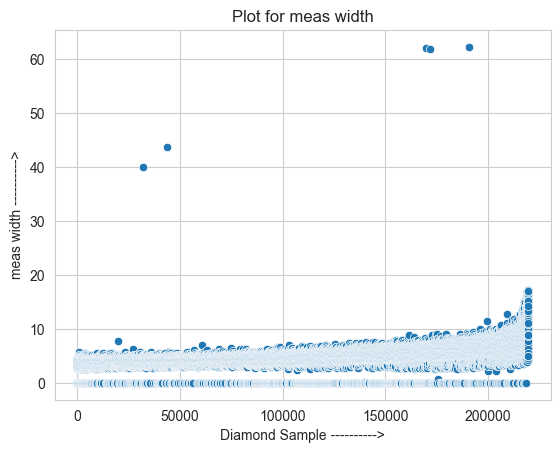

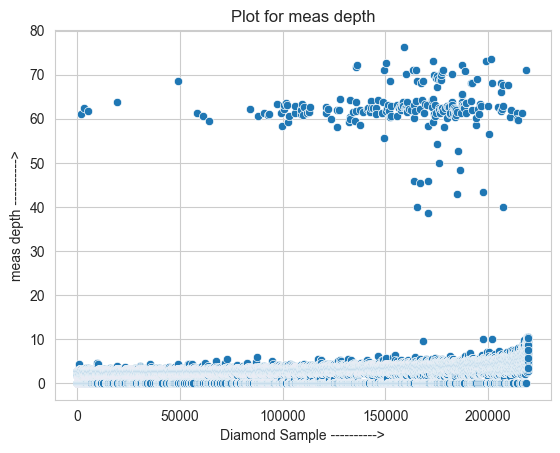

In [12]:
for i in numeric_columns:
    sns.scatterplot(data=df_4[i])
    plt.xlabel("Diamond Sample ---------->")
    plt.ylabel(i.replace("_"," ")+" ---------->")
    plt.title("Plot for "+i.replace("_"," "))
    plt.show()

In [13]:
cond_1 = df_4["depth_percent"] >= 50
cond_2 = df_4["depth_percent"] < 85

cond_3 = df_4["table_percent"] >= 50
cond_4 = df_4["table_percent"] < 80

cond_5 = df_4["meas_length"] > 0
cond_6 = df_4["meas_length"] < 30

cond_7 = df_4["meas_width"] > 0
cond_8 = df_4["meas_width"] < 20

cond_9 = df_4["meas_depth"] > 0
cond_10 = df_4["meas_depth"] < 10

cond_11 = df_4["depth_percent"] != 0
cond_12 = df_4["table_percent"] != 0

cond = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6 & cond_7 & cond_8 & cond_9 & cond_10 & cond_11 & cond_12

df_5 = df_4[cond].reset_index(drop=True)
df_5.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,6,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,6,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,6,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,6,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,6,12,10,7,9,200


In [14]:
len(df_5)

208824

In [15]:
len(df_4)

215823

### Feature selection and Data splitting

In [16]:
df_5.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,6,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,6,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,6,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,6,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,6,12,10,7,9,200


In [17]:
X = df_5.drop(columns="total_sales_price")
y = df_5["total_sales_price"]

mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X),columns=X.columns)
X.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,0.375,...,0.158145,0.135394,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.1,1.0,0.000519,0.8,1.0,1.0,1.0,1.0,0.375,...,0.159334,0.134328,0.111111,0.111111,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,1.000,...,0.159929,0.133262,0.444444,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,1.000,...,0.158740,0.134328,0.000000,0.111111,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.1,1.0,0.000519,0.8,1.0,1.0,0.0,1.0,0.375,...,0.155767,0.138593,0.111111,0.111111,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
f_regr = f_regression(X,y)
f_res = pd.DataFrame(columns=["columns","f-values","p-values"])
f_res["columns"] = X.columns
f_res["f-values"] = f_regr[0]
f_res["p-values"] = f_regr[1].round(2)
f_res = f_res[f_res["p-values"]<0.05].reset_index(drop=True)
features_order = f_res.sort_values(by="f-values",ascending=False).reset_index(drop=True)
best_features = features_order["columns"].values[0:15]
print(best_features)

['carat_weight' 'meas_depth' 'meas_width' 'meas_length' 'cut'
 'fancy_color_intensity' 'table_percent' 'fancy_color_dominant_color'
 'cut_quality' 'color' 'eye_clean' 'depth_percent' 'fluor_color'
 'fancy_color_secondary_color' 'culet_condition']


In [19]:
X_2 = X[best_features]
X_2.head()

,carat_weight,meas_depth,meas_width,meas_length,cut,fancy_color_intensity,table_percent,fancy_color_dominant_color,cut_quality,color,eye_clean,depth_percent,fluor_color,fancy_color_secondary_color,culet_condition
0,0.000519,0.135394,0.158145,0.126468,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.363897,1.0,1.0,1.0
1,0.000519,0.134328,0.159334,0.126016,1.0,1.0,0.301003,1.0,0.8,0.1,1.0,0.340974,1.0,1.0,1.0
2,0.000519,0.133262,0.159929,0.127823,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.318052,1.0,1.0,1.0
3,0.000519,0.134328,0.158740,0.126920,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.343840,1.0,1.0,1.0
4,0.000519,0.138593,0.155767,0.123758,1.0,1.0,0.284281,1.0,0.8,0.1,1.0,0.426934,1.0,1.0,1.0


In [20]:
y_2 = y.copy()

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,test_size=0.2,random_state=np.random.randint(0,1000))

### Modelling the Regression

In [22]:
linear_regr = LinearRegression()
linear_regr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = np.round(np.abs(linear_regr.predict(X_test)),2)
print(y_pred[0:10])

[ 8680.99  7104.56  2965.91  9364.41  3602.91  7852.94  4257.82 16253.44
   861.47  3208.17]


In [24]:
intercept = round(linear_regr.intercept_,2)
coefficients = np.round(linear_regr.coef_,2)
print(coefficients.tolist())

[774363.85, -230858.72, 128059.97, -72114.26, 6434.35, 126.43, -10674.94, -23486.86, 166.37, -7974.74, 1305.68, 19435.1, 121.96, -1063.15, -3274.79]


In [25]:
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) * 100

print("Mean Absolute Error : ",round(mae,2))
print("R2 Score            : ",round(r2))

Mean Absolute Error :  3500.15
R2 Score            :  65


### Neural Networks

In [26]:
X_3 = df_5.drop(columns="total_sales_price")
y_3 = df_5["total_sales_price"]

X_train_val_2,X_test_2,y_train_val_2,y_test_2 = train_test_split(X_3,y_3,test_size=0.2,random_state=np.random.randint(0,1000))
X_train_2,X_val_2,y_train_2,y_val_2 = train_test_split(X_train_val_2,y_train_val_2,test_size=0.2,random_state=np.random.randint(0,1000))

In [27]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(units=50,activation="relu",input_dim=X_3.shape[1]),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=50,activation="relu"),
    tf.keras.layers.Dense(units=1,activation="linear")
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_absolute_error,metrics=["accuracy"])

In [29]:
model.fit(X_train_2,y_train_2,validation_data=(X_val_2,y_val_2),batch_size=32,epochs=100,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
4177/4177 [==============================] - 8s 2ms/step - loss: 2421.4885 - accuracy: 0.0000e+00 - val_loss: 1743.2485 - val_accuracy: 0.0000e+00
Epoch 2/100
4177/4177 [==============================] - 7s 2ms/step - loss: 1679.5758 - accuracy: 0.0000e+00 - val_loss: 1679.1149 - val_accuracy: 0.0000e+00
Epoch 3/100
4177/4177 [==============================] - 7s 2ms/step - loss: 1590.9967 - accuracy: 0.0000e+00 - val_loss: 1483.1196 - val_accuracy: 0.0000e+00
Epoch 4/100
4177/4177 [==============================] - 7s 2ms/step - loss: 1545.8126 - accuracy: 0.0000e+00 - val_loss: 1464.6293 - val_accuracy: 0.0000e+00
Epoch 5/100
4177/4177 [==============================] - 7s 2ms/step - loss: 1510.3744 - accuracy: 0.0000e+00 - val_loss: 1442.0919 - val_accuracy: 0.0000e+00
Epoch 6/100
4177/4177 [==============================] - 7s 2ms/step - loss: 1479.3176 - accuracy: 0.0000e+00 - val_loss: 1419.5800 - val_accuracy: 0.0000e+00
Epoch 7/100
4177/4177 [=======================

In [30]:
y_pred_2 = np.abs(model.predict(X_test_2))
print(y_pred_2[0:10])

1306/1306 [==============================] - 1s 917us/step
[[ 9630.612  ]
 [  863.8445 ]
 [  915.18207]
 [15899.508  ]
 [ 1907.6063 ]
 [14030.178  ]
 [  860.45996]
 [ 4076.2092 ]
 [  848.66907]
 [12929.571  ]]


In [31]:
mae_2 = mean_absolute_error(y_test_2,y_pred_2)
r2_2 = r2_score(y_test_2,y_pred_2)

print("Mean Absolute Error : ",round(mae_2,2))
print("R2 score            : ",round(r2_2,2))

Mean Absolute Error :  1528.78
R2 score            :  0.77
